# Linear regression after reading multiple coulumn data from Excel sheet

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
df = pd.read_csv('/content/sample_data/california_housing_test.csv')
print(df)

      longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0       -122.05     37.37                27.0       3885.0           661.0   
1       -118.30     34.26                43.0       1510.0           310.0   
2       -117.81     33.78                27.0       3589.0           507.0   
3       -118.36     33.82                28.0         67.0            15.0   
4       -119.67     36.33                19.0       1241.0           244.0   
...         ...       ...                 ...          ...             ...   
2995    -119.86     34.42                23.0       1450.0           642.0   
2996    -118.14     34.06                27.0       5257.0          1082.0   
2997    -119.70     36.30                10.0        956.0           201.0   
2998    -117.12     34.10                40.0         96.0            14.0   
2999    -119.63     34.42                42.0       1765.0           263.0   

      population  households  median_income  median_house_value

In [3]:
df = df.loc[ 0:1000 , ('total_rooms', 'population' , 'median_income') ]
df

,total_rooms,population,median_income
0,3885.0,1537.0,6.6085
1,1510.0,809.0,3.5990
2,3589.0,1484.0,5.7934
3,67.0,49.0,6.1359
4,1241.0,850.0,2.9375
...,...,...,...
996,1789.0,897.0,5.5920
997,308.0,59.0,11.7794
998,1601.0,784.0,3.0642
999,3403.0,3432.0,1.7083


In [4]:
room = df.loc[0:50 , 'total_rooms']
pop = df.loc[50:100 , 'population']
income_room = df.loc[0:50 , 'median_income']
income_pop = df.loc[50:100 , 'median_income']
room = room.to_numpy()
pop = pop.to_numpy()
income_room = income_room.to_numpy()
income_pop = income_pop.to_numpy()


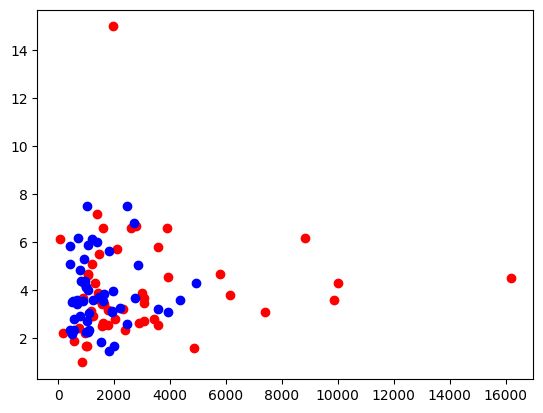

In [6]:
room = room.reshape((-1,1))
pop = pop.reshape((-1,1))
plt.scatter(room , income_room , color = 'red')
plt.scatter ( pop ,income_pop , color = 'blue')
#plt.scatter ( income ,income , color = 'grey')
plt.show()

In [7]:
from sklearn.linear_model import LinearRegression
slr = LinearRegression()
slr.fit(room, income_room)
slr.fit(pop , income_pop)

LinearRegression()

In [8]:
pred_room = slr.predict(room)
pred_pop = slr.predict(pop)

In [9]:
from sklearn.metrics import mean_squared_error
mse_r = mean_squared_error(income_room , pred_room)
mse_p = mean_squared_error(income_pop , pred_pop)

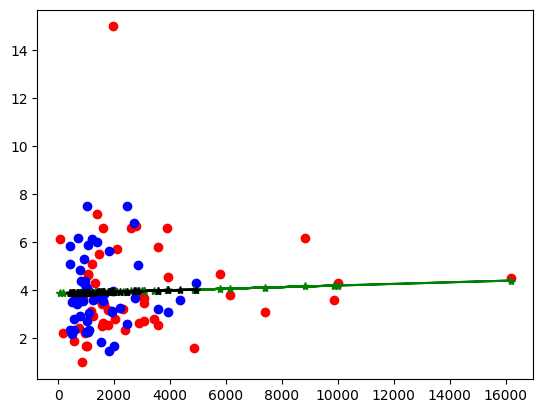

In [10]:
plt.scatter(room , income_room , color = 'red')
plt.scatter ( pop ,income_pop , color = 'blue')
plt.plot (room , pred_room, color = 'green', marker= '*')
plt.plot (pop , pred_pop , color= 'black', marker = '*')
plt.show()